# Data Exploration - DBSCAN
Where are defected boilers geographically clustered and how does that compare to where inspections/boilers are clustered?

In [34]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# dbn = pd.read_csv('data/dbncats_ppacs.csv')
dbn = pd.read_csv('data/all_boilder_year_data_w_ACS.csv',
                 usecols=['bin_number', 'defects_exist', 'xcoord', 'ycoord'])
print(dbn.shape)
dbn.head()

(1632518, 4)


,bin_number,defects_exist,xcoord,ycoord
0,1080776,0,988184.0,210527.0
1,1080776,0,988184.0,210527.0
2,1080776,0,988184.0,210527.0
3,1080776,0,988184.0,210527.0
4,1080776,0,988184.0,210527.0


In [12]:
import datetime

In [39]:
dbn.dropna(axis=0, inplace=True)

In [40]:
defects = dbn[dbn.defects_exist == 1]
defects_coords = defects.iloc[:,2:]
dbn_coords = dbn.iloc[:,2:]

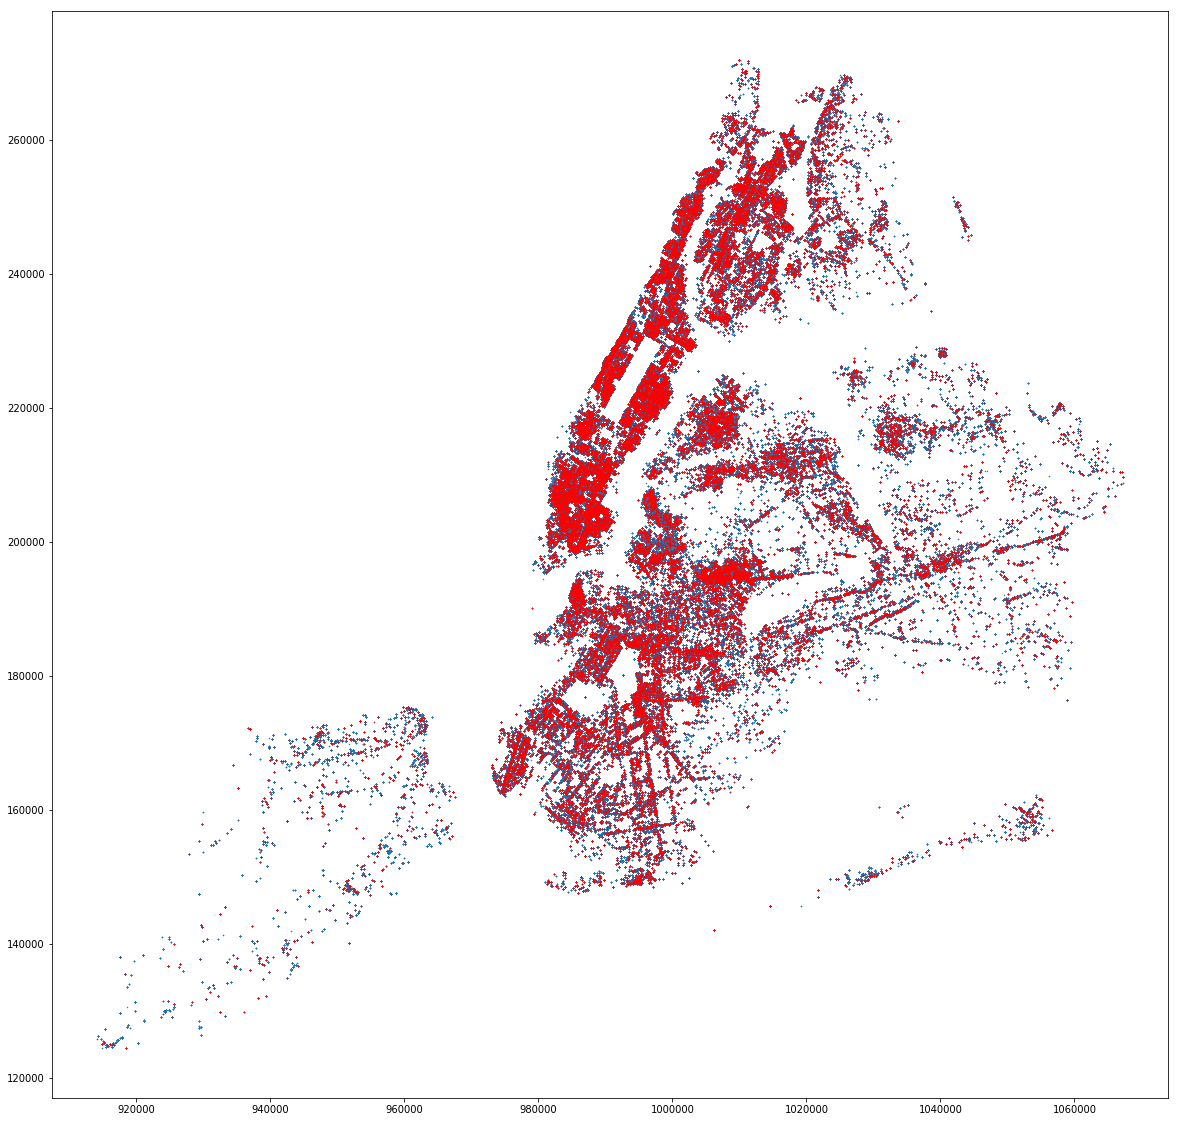

5.038593


In [33]:
# plot of all inspections and defects
plt.figure(figsize=(20,20))
plt.scatter(dbn.xcoord, dbn.ycoord, s=0.1, zorder=0)
plt.scatter(defects.xcoord, defects.ycoord, color='r', s=0.1, zorder=1)
plt.axis('equal')
plt.show()

### DBSCAN with defects

In [ ]:
start = datetime.datetime.now()
precision_list = []
recall_list = []
eps_list = []
min_samples_list = []
num_points = []

total_num_samples = len(defects_coords.iloc[:,0])
max_eps = max(np.max(defects_coords.iloc[:,0])-np.min(defects_coords.iloc[:,0]),
              np.max(defects_coords.iloc[:,1])-np.min(defects_coords.iloc[:,1]))

for eps in np.logspace(np.log10(max_eps)-5,np.log10(max_eps),5):
    for min_samples in np.linspace(10,100,10,endpoint=True):
#     eps, min_samples = 0.02, 50
        db = DBSCAN(eps, min_samples).fit(defects_coords)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
    #         dbb=db
#             plt.figure(figsize=(12,12))
#             print ("eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0]))      
#             # evaluation
#             num_correct_clustered = len(db.labels_[0:100][db.labels_[0:100] >= 0])
#             print ("precision=",1.0*num_correct_clustered/num_clustered,"recall=",1.0*num_correct_clustered/100.0)
#             plt.scatter(defects_coords.iloc[:,0],defects_coords.iloc[:,1],c=db.labels_,s=0.1,cmap=plt.cm.cool)
#             plt.show()
            precision_list.append(num_correct_clustered/num_clustered)
            recall_list.append(1.0*num_correct_clustered/100.0)
            eps_list.append(eps)
            min_samples_list.append(min_samples)
            num_points.append(len(db.labels_[db.labels_ >= 0]))

end = datetime.datetime.now()
print((end-start).total_seconds())


In [ ]:
db = DBSCAN(eps, min_samples).fit(defects_coords)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
    #         dbb=db
#             plt.figure(figsize=(12,12))
#             print ("eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0]))      
#             # evaluation
#             num_correct_clustered = len(db.labels_[0:100][db.labels_[0:100] >= 0])
#             print ("precision=",1.0*num_correct_clustered/num_clustered,"recall=",1.0*num_correct_clustered/100.0)
#             plt.scatter(defects_coords.iloc[:,0],defects_coords.iloc[:,1],c=db.labels_,s=0.1,cmap=plt.cm.cool)
#             plt.show()